# Retention Example 

In [69]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from __future__ import division
from sklearn import linear_model
import numpy as np
mpl.rc('savefig', dpi=100)
plt.style.use('ggplot')

In [160]:
# Let's load our dataset and take a look at it in a couple of ways.
data = pd.read_csv("student-mat.csv").dropna()
data.head()
# Satisfaction
# Last project evaluation
# Average number of hours worked per project
# Number of projects
# Time in company
# Newborn
# Left the company

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [161]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


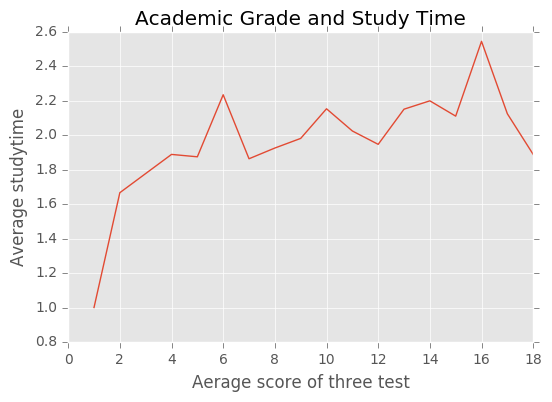

In [162]:
# The relationship between Academic Performance and Study Time
data["Ave_score"]=(data["G1"]+data["G2"]+data["G3"])/3//1
axis_y=np.array([data[data["Ave_score"]==0]["studytime"].mean(),data[data["Ave_score"]==1]["studytime"].mean(),
                data[data["Ave_score"]==2]["studytime"].mean(),data[data["Ave_score"]==3]["studytime"].mean()
               ,data[data["Ave_score"]==4]["studytime"].mean(),data[data["Ave_score"]==5]["studytime"].mean()
                ,data[data["Ave_score"]==6]["studytime"].mean(),data[data["Ave_score"]==7]["studytime"].mean()
                ,data[data["Ave_score"]==8]["studytime"].mean(),data[data["Ave_score"]==9]["studytime"].mean()
                ,data[data["Ave_score"]==10]["studytime"].mean(),data[data["Ave_score"]==11]["studytime"].mean()
                ,data[data["Ave_score"]==12]["studytime"].mean(),data[data["Ave_score"]==13]["studytime"].mean()
                ,data[data["Ave_score"]==14]["studytime"].mean(),data[data["Ave_score"]==15]["studytime"].mean()
                ,data[data["Ave_score"]==16]["studytime"].mean(),data[data["Ave_score"]==17]["studytime"].mean()
                ,data[data["Ave_score"]==18]["studytime"].mean()
                ])
plt.plot(np.arange(0,19),axis_y)
plt.title("Academic Grade and Study Time")
plt.xlabel("Aerage score of three test")
plt.ylabel("Average studytime")

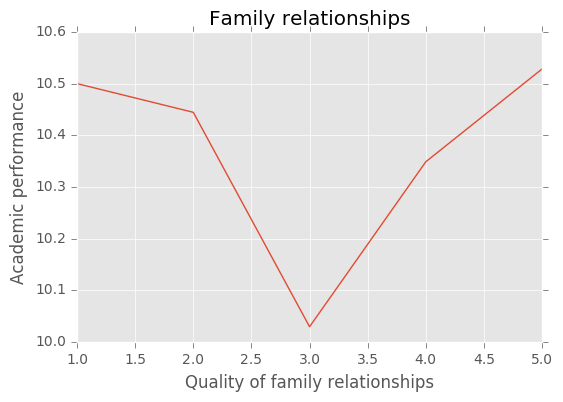

In [145]:
# relationship between quality of family relationships and academic performance
project_bins = pd.cut(data["famrel"], 5)
project_bins.cat.categories
data_grouped_by_pbin = data.groupby(project_bins)
plt.plot(data_grouped_by_pbin["famrel"].mean(),
         data_grouped_by_pbin["Ave_score"].mean()
            )
plt.title("Family relationships")
plt.xlabel("Quality of family relationships")
plt.ylabel("Academic performance")
plt.show()

In [168]:
#Average score of students who take extra classes within the course subject yes or no
[data[data["higher"]=="yes"]["Ave_score"].mean(),data[data["higher"]=="no"]["Ave_score"].mean()]

[10.514666666666667, 7.25]

In [164]:
hist_data=[data[data["paid"]=="yes"]["Ave_score"].mean(),
      data[data["internet"]=="yes"]["Ave_score"].mean(),
     data[data["romantic"]=="yes"]["Ave_score"].mean()
     ]
print(hist_data)

[10.740331491712707, 10.52887537993921, 9.825757575757576]


(array([ 1.09340534,  0.        ,  2.18681067]),
 array([  9.82575758,  10.13061555,  10.43547352,  10.74033149]),
 <a list of 3 Patch objects>)

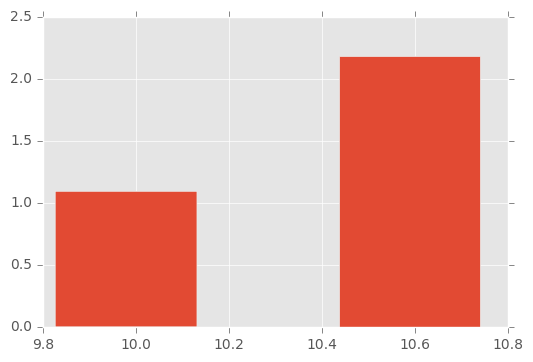

In [166]:
bins=np.array([10,10.5,11])
plt.hist(hist_data, 3, normed=True)

In [133]:
data[data["famrel"]==3]["Ave_score"].mean()

10.029411764705882

In [42]:
# Look at the frequencies for the left variable
#data["Topic"].value_counts() 
data_gp=data[data["school"]=="GP"]
data_gp.head()
data_gp["Ave_score"]=(data_gp["G1"]+data_gp["G2"]+data_gp["G3"])/3
data_gp["score"]=if data_gp["Ave_score"]>=15:"A" 
data_gp.describe()

SyntaxError: invalid syntax (<ipython-input-42-95e0aec9fbe9>, line 6)

In [5]:
data_gp["left"].value_counts(normalize=True) 

0    0.833333
1    0.166667
Name: left, dtype: float64

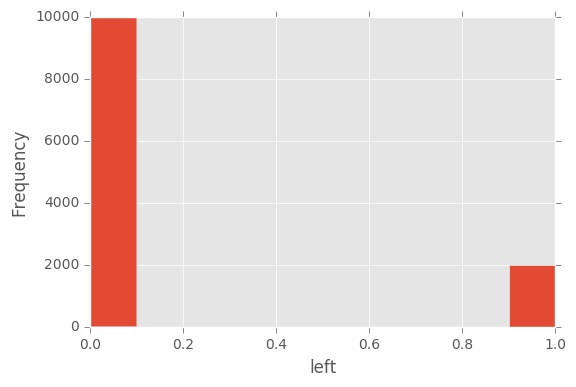

In [3]:
# alternatively, plot a histogram
plt.hist(data["left"])
plt.xlabel("left")
plt.ylabel("Frequency")

In [170]:
# Let's check out the RSS of linear regression(linear combination of failures and Medu)

data_gp.corr()
X_train=np.array([data_gp["failures"].tolist(),data_gp["Medu"].tolist()]).transpose()
y_train=np.array(data_gp["Ave_score"].tolist())
lreg=linear_model.LinearRegression()
lreg.fit(X_train, y_train,sample_weight=None)
lreg.score(X_train, y_train)

0.15759856398117089

In [43]:
# Estimate the drivers of attrition using a Generalized Linear Model.
# http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/glm_formula.html
# The formula is again of the form
#   response variable ~ explanatory variables
linreg = smf.glm(
    formula="Ave_score ~ Medu + Fedu+studytime+freetime+health+absences+traveltime+failures",
    data=data_gp,
    ).fit()
linreg = smf.glm(
    formula="Ave_score ~ Medu+failures",
    data=data_gp,
    ).fit()

In [169]:
logreg.summary()
#lreg.predict(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Ave_score   No. Observations:                  349
Model:                            GLM   Df Residuals:                      346
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                   11.7093013624
Method:                          IRLS   Log-Likelihood:                -923.04
Date:                Wed, 11 Jan 2017   Deviance:                       4051.4
Time:                        21:37:40   Pearson chi2:                 4.05e+03
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     10.1594      0.551     18.447      0.000         9.080    11.239
Medu           0.4091      0.176      2.319      0.020         0.063     0.755
failures      -1.7869      0.257     -6.961      0.000        -2.290    -1.284
==============================================================================
"""

In [57]:
predicted_rating = logreg.predict()
predicted_rating = pd.Series(predicted_rating, name="PredictedRating")
predicted_rating.corr(data_gp["Ave_score"])

0.39698685618187801

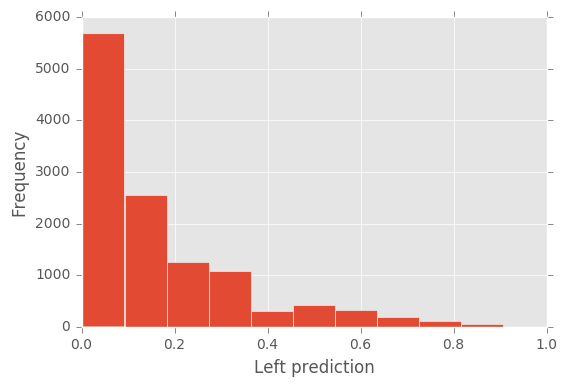

In [7]:
# See the proportion of employee attrition according to the model
predicted_left_continuous = pd.Series(logreg.predict())
plt.hist(predicted_left_continuous)
plt.xlabel("Left prediction")
plt.ylabel("Frequency")

In [8]:
# Assess the correlation between estimated attrition and actual
predicted_left_continuous.corr(data["left"])

0.40520165758187826

In [163]:
# Cutoff to determine when P[leaving] should be considered as a leaver or not.
# Note you can play with this parameter.
cutoff=0.5
predicted_left = (predicted_left_continuous > cutoff)

NameError: name 'predicted_left_continuous' is not defined

In [10]:
# Compute the accuracy of our prediction.
did_leave = (data["left"] == 1)
predicted_correct = (predicted_left == did_leave)
print("Overall accuracy:")
print("%d / %d =" % (predicted_correct.sum(), predicted_correct.count()))
print(predicted_correct.sum() / predicted_correct.count())

Overall accuracy:
9845 / 12000 =
0.820416666667


In [11]:
# Compute how well we did on the people who stayed.
did_stay = (data["left"] == 0)
print((predicted_correct & did_stay).sum() / did_stay.sum())

0.9464


In [12]:
# Compute how well we did on the people who left.
print((predicted_correct & did_leave).sum() / did_leave.sum())

0.1905


# Looking at Time in Company

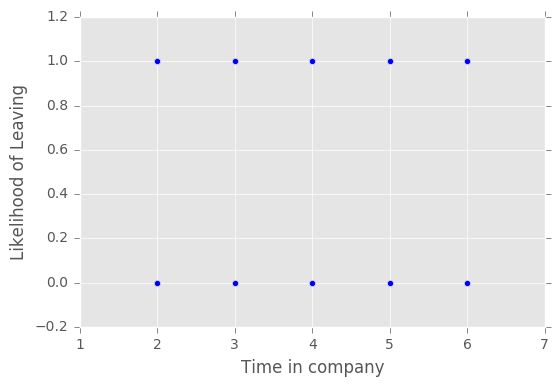

In [13]:
# Let's use a more visual way to see the effect of one of the most important driver: TIC
plt.scatter(data["TIC"], data["left"])
plt.xlabel("Time in company")
plt.ylabel("Likelihood of Leaving")
plt.show()

In [14]:
# That was useless. Let's try plotting the average rate of attrition
# for each of the TIC values.

In [15]:
# This returns a GroupBy object.
# http://pandas.pydata.org/pandas-docs/stable/api.html#id35
data_grouped_by_tic = data["left"].groupby(data["TIC"])
data_grouped_by_tic

In [18]:
# Let's compute the mean within each group.
data_grouped_by_tic_mean = data_grouped_by_tic.mean()
data_grouped_by_tic_mean

TIC
2    0.010262
3    0.165727
4    0.240777
5    0.444240
6    0.212891
Name: left, dtype: float64

In [19]:
# Note that we can get at the TIC value by using the index property.
data_grouped_by_tic_mean.index

Int64Index([2, 3, 4, 5, 6], dtype='int64', name=u'TIC')

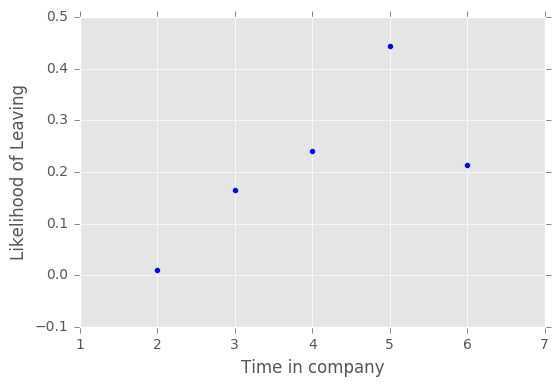

In [20]:
# Now let's try a scatter plot of the means.
plt.scatter(data_grouped_by_tic_mean.index,
            data_grouped_by_tic_mean)
plt.xlabel("Time in company")
plt.ylabel("Likelihood of Leaving")
plt.show()

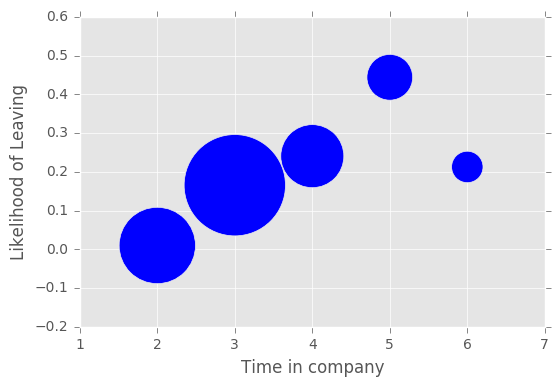

In [21]:
# We could further improve this by using the count within each group
# for the size of the button.
plt.scatter(data_grouped_by_tic_mean.index,
            data_grouped_by_tic_mean,
            s=data_grouped_by_tic.count())
plt.xlabel("Time in company")
plt.ylabel("Likelihood of Leaving")
plt.show()

# Looking at Employee Satisfaction

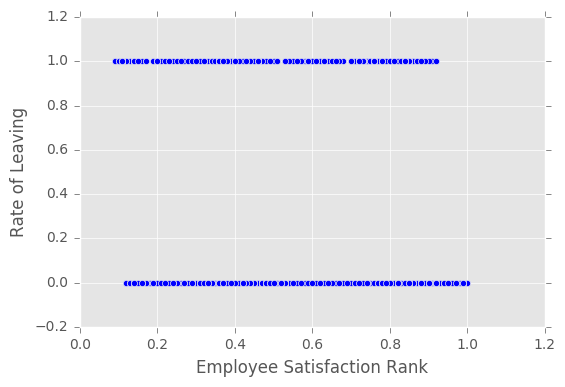

In [16]:
# Let's try to visualize this, and go make the same mistake that
# we made last time.
plt.scatter(data["S"], data["left"])
plt.xlabel("Employee Satisfaction Rank")
plt.ylabel("Rate of Leaving")
plt.show()

In [17]:
# Last time, there were just 5 "x" values, so we could group the
# attrition by those values. This time it's harder. Our strategy
# will be to create 20 satisfaction bins, and examine the attrition
# within each of these bins.

In [18]:
# Use the cut function to cut into 20 bins.
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
satisfaction_bins = pd.cut(data["S"], 20)
satisfaction_bins.cat.categories

Index(['(0.0891, 0.136]', '(0.136, 0.181]', '(0.181, 0.227]', '(0.227, 0.272]',
       '(0.272, 0.318]', '(0.318, 0.363]', '(0.363, 0.408]', '(0.408, 0.454]',
       '(0.454, 0.499]', '(0.499, 0.545]', '(0.545, 0.59]', '(0.59, 0.636]',
       '(0.636, 0.681]', '(0.681, 0.727]', '(0.727, 0.772]', '(0.772, 0.818]',
       '(0.818, 0.863]', '(0.863, 0.909]', '(0.909, 0.954]', '(0.954, 1]'],
      dtype='object')

In [19]:
# Now group the data by "satisfaction bin". This time we're grouping
# the full DataFrame, because we'll want to deal with "S" and "left".
data_grouped_by_sbin = data.groupby(satisfaction_bins)

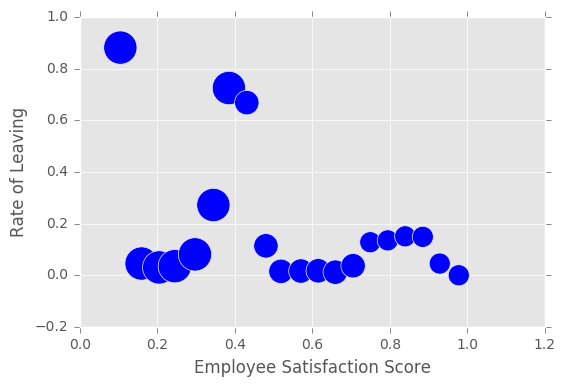

In [26]:
# Now let's take a look at rate of leaving as a function of employee
# satisfaction.
plt.scatter(data_grouped_by_sbin["S"].mean(),
            data_grouped_by_sbin["left"].mean(),
            s=data_grouped_by_sbin.count())
plt.xlabel("Employee Satisfaction Score")
plt.ylabel("Rate of Leaving")
plt.show()

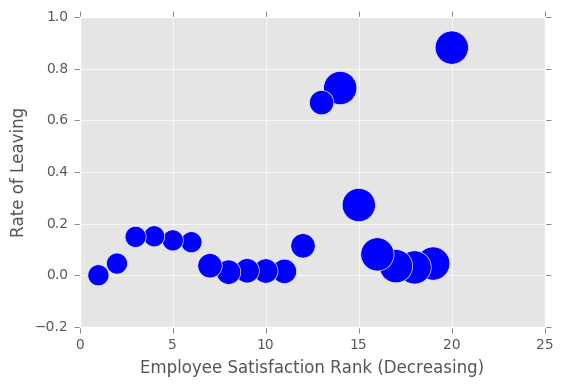

In [20]:
# Or we can plot by dissatisfaction bin.
plt.scatter(range(20,0,-1),
            data_grouped_by_sbin["left"].mean(),
            s=data_grouped_by_sbin.count())
plt.xlabel("Employee Satisfaction Rank (Decreasing)")
plt.ylabel("Rate of Leaving")
plt.show()

In [28]:
newborn_bins = pd.cut(data["Newborn"], 2)
newborn_bins.cat.categories
#data["Newborn"]

Index(['(-0.001, 0.5]', '(0.5, 1]'], dtype='object')

In [30]:
data_grouped_by_bbin = data.groupby(newborn_bins)

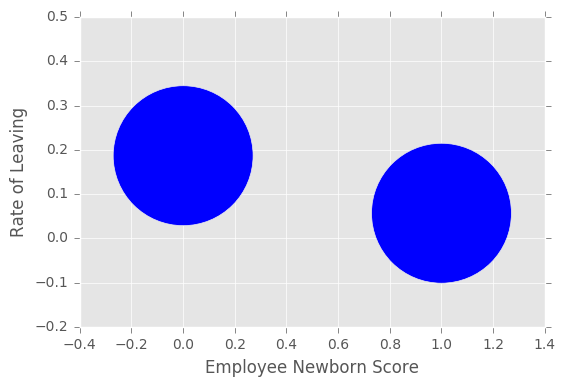

In [31]:
plt.scatter(data_grouped_by_bbin["Newborn"].mean(),
            data_grouped_by_bbin["left"].mean(),
            s=data_grouped_by_bbin.count())
plt.xlabel("Employee Newborn Score")
plt.ylabel("Rate of Leaving")
plt.show()

In [38]:
project_bins = pd.cut(data["NP"], 20)
project_bins.cat.categories

Index(['(1.995, 2.25]', '(2.25, 2.5]', '(2.5, 2.75]', '(2.75, 3]', '(3, 3.25]',
       '(3.25, 3.5]', '(3.5, 3.75]', '(3.75, 4]', '(4, 4.25]', '(4.25, 4.5]',
       '(4.5, 4.75]', '(4.75, 5]', '(5, 5.25]', '(5.25, 5.5]', '(5.5, 5.75]',
       '(5.75, 6]', '(6, 6.25]', '(6.25, 6.5]', '(6.5, 6.75]', '(6.75, 7]'],
      dtype='object')

In [39]:
data_grouped_by_pbin = data.groupby(project_bins)

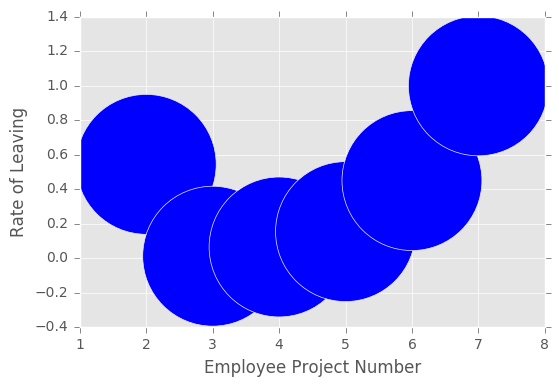

In [40]:
plt.scatter(data_grouped_by_pbin["NP"].mean(),
            data_grouped_by_pbin["left"].mean(),
            s=data_grouped_by_bbin.count())
plt.xlabel("Employee Project Number")
plt.ylabel("Rate of Leaving")
plt.show()

Feature ranking:
1. feature 16 (0.054073)
2. feature 29 (0.048469)
3. feature 33 (0.048091)
4. feature 15 (0.043245)
5. feature 28 (0.040846)
6. feature 21 (0.040580)
7. feature 1 (0.038804)
8. feature 7 (0.034128)
9. feature 23 (0.030918)
10. feature 54 (0.028996)
11. feature 55 (0.022874)
12. feature 0 (0.020528)
13. feature 22 (0.020347)
14. feature 52 (0.019390)
15. feature 18 (0.018844)
16. feature 45 (0.018557)
17. feature 4 (0.018098)
18. feature 40 (0.018077)
19. feature 53 (0.017705)
20. feature 42 (0.017075)
21. feature 27 (0.016976)
22. feature 31 (0.015626)
23. feature 46 (0.015561)
24. feature 47 (0.015525)
25. feature 25 (0.015348)
26. feature 5 (0.014752)
27. feature 19 (0.014507)
28. feature 11 (0.014428)
29. feature 38 (0.014299)
30. feature 37 (0.014126)
31. feature 30 (0.013626)
32. feature 10 (0.013395)
33. feature 17 (0.013283)
34. feature 24 (0.012914)
35. feature 41 (0.012811)
36. feature 39 (0.012556)
37. feature 51 (0.012494)
38. feature 36 (0.012035)
39. featu

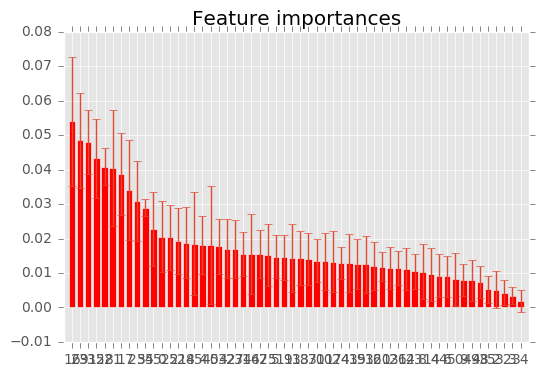

In [172]:
import csv
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from collections import Counter
import numpy as np
import scipy.io
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt
rawdata=pd.read_csv("student-mat.csv").dropna()
'''
x_train=rawdata.as_matrix().astype('str')
#x_test=mat['test_data']
y_train=x_train[:,32]
#y_train=np.reshape(y_train,(y_train.shape[1],))
#x_train=transformlog(x_train)
#x_test=transformlog(x_test)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_features=6,max_depth=30)
#clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_train,y_train)

y_pred=clf.predict(x_test)
'''
x_rawdata=rawdata.drop('G1', 1)
x_rawdata=x_rawdata.drop('G2', 1)
x_rawdata=x_rawdata.drop('G3', 1)
x_dic=x_rawdata.to_dict(orient='index')
x_list=[x_dic[i]for i in range(len(x_dic))]
vec = DictVectorizer()
x_train=vec.fit_transform(x_list).toarray()
name=vec.get_feature_names()
    #xtest_dic=rawdata_t.to_dict(orient='index')
    #xtest_list=[xtest_dic[i]for i in range(len(xtest_dic))]
    # direct transform using fitted dictvectorizer()
    #x_test=vec.transform(xtest_list).toarray()
y_train=((rawdata['G1']+rawdata['G2']+rawdata['G3'])/3//1).tolist()
clf = RandomForestClassifier(max_features=6,max_depth=20)
#clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_train,y_train)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

#for f in range(x_train.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices[:-10]], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

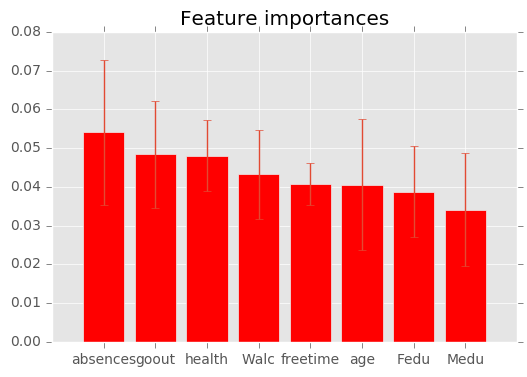

In [180]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(8), importances[indices[:8]],
       color="r", yerr=std[indices[:8]], align="center")
plt.xticks(range(8), [name[i]for i in indices[:8]])
plt.xlim([-1, 8])
plt.show()